In [33]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)

kk 0 kiki


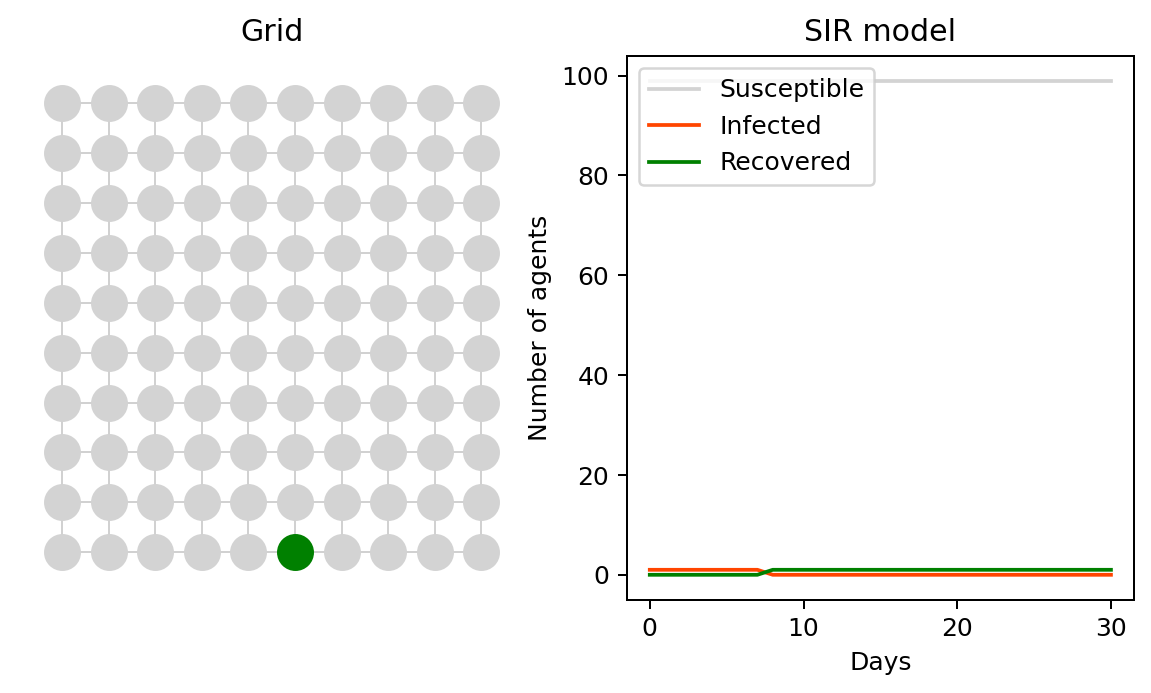

In [44]:
# CS 201 12/5/2021

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_SIR(A):
    
    x = range(0, A + 1) # +1 because we also save initial
    plt.plot(x, data_S, color = "lightgrey", label = "Susceptible")
    plt.plot(x, data_I, color = "orangered", label = "Infected")
    plt.plot(x, data_R, color = "green", label = "Recovered")   

    plt.xlabel("Days")
    plt.ylabel("Number of agents")
    plt.legend(loc = "upper left")
    plt.title("SIR model")
    

def plot_G(titletext,G_nodes,A_nodes):    
    
    list_S = []
    list_I = []
    list_R = []
    
    labels = {}
    
    for i in A_nodes:
    
        if i.sus == 1:
            list_S.append(i.grid_id)
        
        if i.inf == 1:
            list_I.append(i.grid_id)
            
        if i.rec == 1:
            list_R.append(i.grid_id)

        labels[i.grid_id] = i.num_id  

    pos = dict(zip(G_nodes,G_nodes)) # dictionary of node names->positions
    nx.draw(G_nodes, pos, nodelist = list_S, node_size = 190, node_color = 'lightgrey',
            with_labels = False, width = 0.05)
    nx.draw(G_nodes, pos, nodelist = list_I, node_size = 190, node_color = 'orangered',
            with_labels = False, width = 0.05)
    nx.draw(G_nodes, pos, nodelist = list_R, node_size = 190, node_color = 'green',
            with_labels = False, width = 0.05)
        
    #nx.draw_networkx_labels(G, pos, labels, font_size = 15, font_color = 'black')
    plt.title(titletext)

class agent:
    
    # class attributes
    num_sus = 0
    num_inf = 0
    num_rec = 0
    mask = 1
    
    def __init__(self, num, grid_node):
        
        # instance/object attributes
        self.num_id = num
        self.grid_id = grid_node
        
        self.sus = 1 
        agent.num_sus += 1
        
        self.inf = 0
        self.inf_t1 = 0
        self.days_sick = 0
        
        self.rec = 0
    
    def getsick(self):
        
        self.sus = 0
        agent.num_sus -= 1
        
        self.inf_t1 = 1
        agent.num_inf += 1
        
        
    def recover(self):
        
        self.inf = 0
        agent.num_inf -= 1
        
        self.rec = 1
        agent.num_rec += 1

T = 30 # number of days/time periods

grid_side = 10 # one dimension of the grid
N = grid_side * grid_side # total agents

pr_sick = 0.3 # probability of getting sick, S meets I
time_recov = 14 # days to recover

# grid_size by grid_size lattice
G = nx.grid_2d_graph(grid_side, grid_side, periodic = False)

A = [] # list of all agents

G_nodes = list(G.nodes)
for i in range(N):
    A.append(agent(i, G_nodes[i]))
    
GA_dict = {} # dictionary {grid_id: agent_id}

for i in A:
    GA_dict[i.grid_id] = i.num_id
    
# plt.figure(num=1, figsize=(6, 3), dpi=300, facecolor='w', edgecolor='k')

# plt.subplot(121)
# plot_G("Before")

# for i in A:
#     if i.num_id >= 41 and i.num_id <= 48:
#         i.getsick()
        
#     if i.num_id >= 51 and i.num_id <= 58:
#         i.recover()
    
# plt.subplot(122)
# plot_G("After")

A[50].getsick()

data_S, data_I, data_R = [], [], []

# initial values for SIR
data_S.append(agent.num_sus)
data_I.append(agent.num_inf)
data_R.append(agent.num_rec)

# time loop starts here
#pr_trans = np.random.uniform(0,1)
pr_trans = np.random.binomial(1,0.5)
print(pr_trans)
for t in range(T):

    for i in A:
        if i.inf == 1:
            i.days_sick += 1
            if i.days_sick == 7:
                i.recover()
    
#     # for testing; use small grid side
#     for g in G.edges:
#         print("New edge: ")
#         print(g)
#         a1 = GA_dict[g[0]]
#         a2 = GA_dict[g[1]]
#         print(f"Agents' ids: {a1}, {a2}")
#         print()
        
# plot_G("testing")  

#how transmition happens
#if infected, infects everyone around who is suseptible
    for g in G.edges:
        a1 = A[GA_dict[g[0]]]
        a2 = A[GA_dict[g[1]]] 
        if a1.inf == 1 and a2.sus == 1:
            rand1 = random.random()
            if rand1 < pr_trans:
                a2.getsick()
        if a2.inf == 1 and a1.sus == 1:
            rand2 = random.random()
            if rand2 < pr_trans:
                a1.getsick()
                
        #if a1.inf == 1 and a2.sus == 1 and agent.mask == 1:
            #prob1 > 0.7
            
        #if prob1 > 0.7:
            #a2.getsick()
            
        #if a2.inf == 1 and a1.sus == 1 and agent.mask == 1:
            #prob2 > 0.7
            
        #if prob2 > 0.7:
            #a1.getsick()
    
    for i in A:
        if i.inf_t1 == 1:
            #pr_trans = np.random.binomial()
            i.inf = 1
            i.inf_t1 = 0
    
    data_S.append(agent.num_sus)
    data_I.append(agent.num_inf)
    data_R.append(agent.num_rec)

# two separate plots
# plt.figure(1)
# plot_G("test")
# plt.figure(2)
# plot_SIR()

plt.figure(num = 1, figsize = (8, 4), dpi = 180)
plt.subplot(121) # num rows, num cols, subplot number
plot_G("Grid",G,A)
plt.subplot(122)
plot_SIR(T)